# Proyecto Ciencia de Datos en Python

### Caga de Dataset y Split

In [236]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#carga de datos
dataset = np.load('proyecto_data/proyecto_training_data.npy')

np.shape(dataset)
split_row = int(dataset.shape[0]*0.8)

#realizamos el Train - Test split
train_dataset = dataset[0: split_row ][:]
test_dataset  = dataset[split_row : ][:]

## Análisis Exploratorio de Datos

In [210]:
variables=["SalePrice", "OverallQual", "1stFlrSF","TotRmsAbvGrd","YearBuilt","LotFrontage"]

df = pd.DataFrame(dataset, columns=variables)
describe_df = df.describe() #utilizamos describe para obtener los datos de estadística descriptiva
describe_df = describe_df.append(pd.Series(df.max()-df.min(),name="range"))
describe_df = describe_df.drop(["count","25%","50%","75%"]) #eliminamos las filas que no nos interesan desplegar
describe_df = describe_df.reindex(["mean","max","min","range", "std"])

describe_df


,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
mean,180921.195890,6.099315,1162.626712,6.517808,1971.267808,70.049958
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
range,720100.000000,9.000000,4358.000000,12.000000,138.000000,292.000000
std,79442.502883,1.382997,386.587738,1.625393,30.202904,24.284752


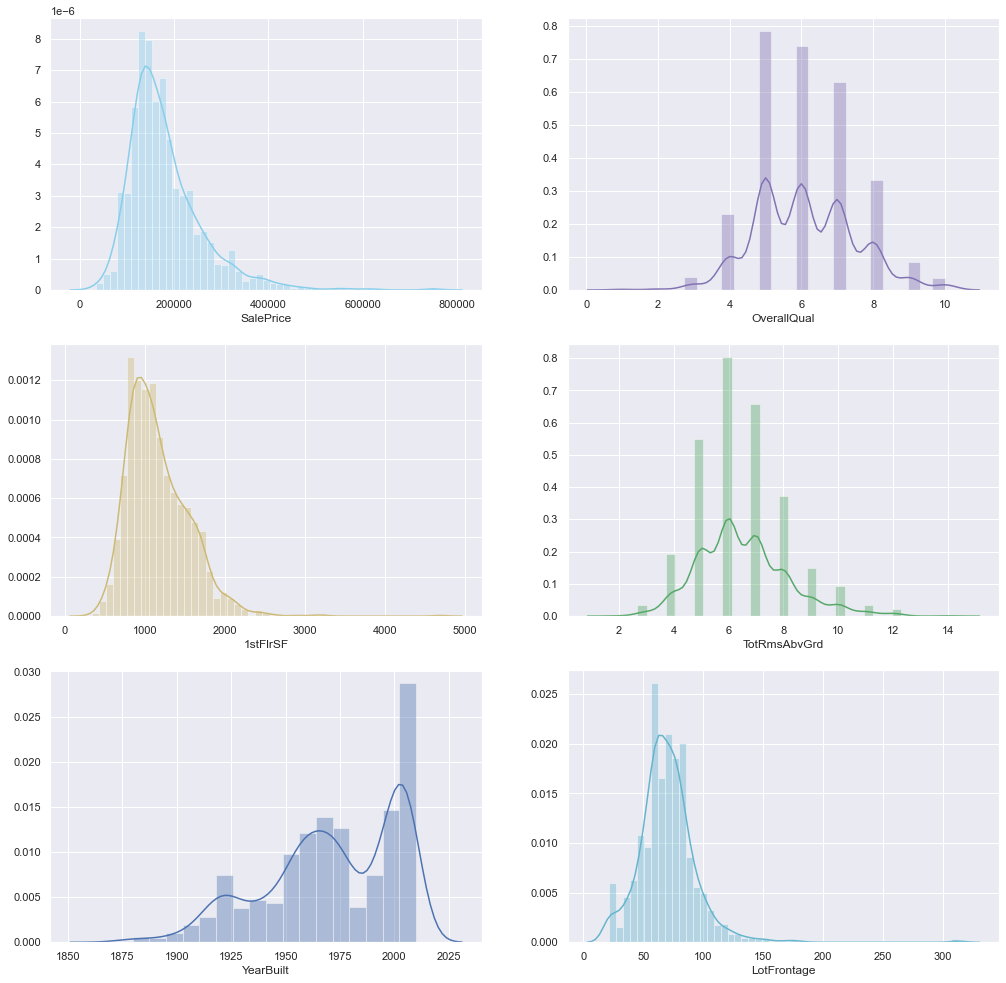

In [243]:
sns.set();

f,axes = plt.subplots(3,2,sharex=False, figsize=(17,17))
colors = ["skyblue","m","y","g","b","c"]
for i in range(0,len(variables)): 
    sns.distplot(df[variables[i]] , color=colors[i], ax=axes[i//2,i%2])
    
plt.show()

## Correlación de Variables

In [271]:
correlation = []
for i in range(1,len(variables)): #se excluye el precio ya que esta es la variable contra la que se correlaciona
    correlation.append(df[variables[0]].corr(df[variables[i]]))

corr = pd.Series(correlation, name=variables[0], index=variables[1:])
corr.to_frame().T

,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
SalePrice,0.790982,0.605852,0.533723,0.522897,0.351799


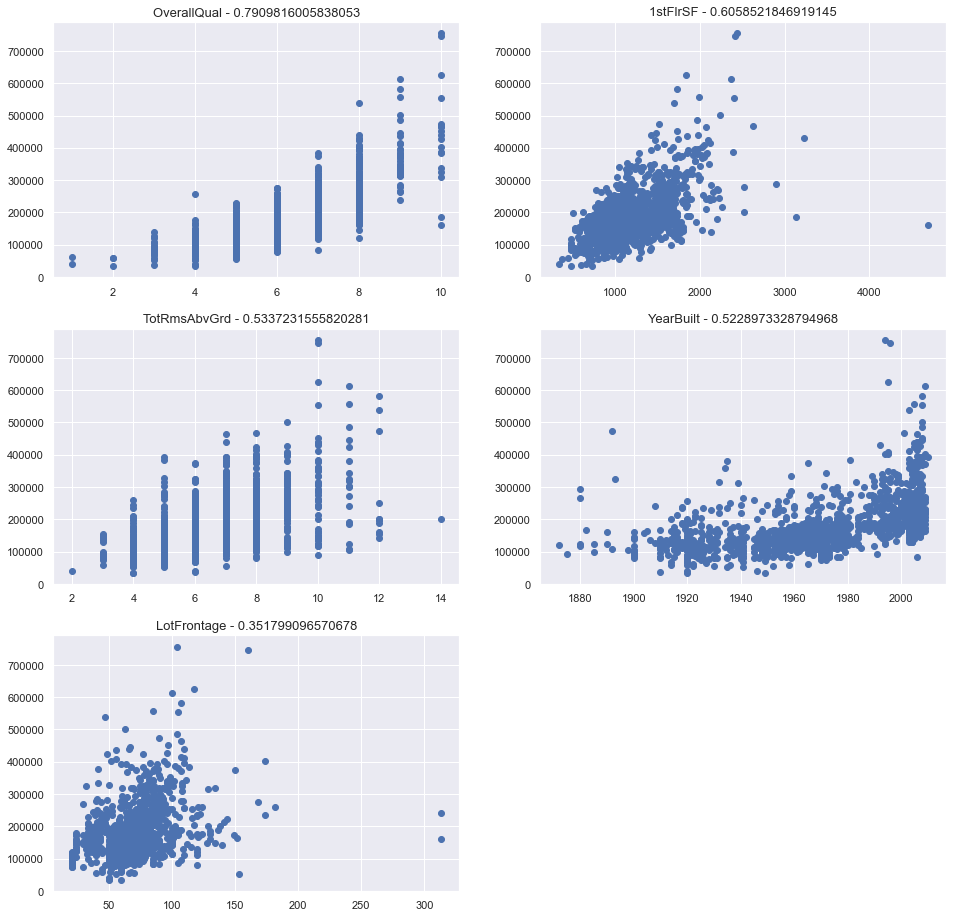

In [286]:
f,axes = plt.subplots(3,2,sharex=False, figsize=(16,16))

for i in range(1,len(variables)):
    plt.subplot(3,2,i)
    plt.scatter(df[variables[i]], df[variables[0]])
    plt.title(variables[i]+" - "+str(corr[variables[i]]), FontSize=13)

f.delaxes(axes[2,1])
plt.show()

## Elección de Variables con Potencial Predictivo

Basado en los datos calculados y la gráficas generadas, podemos concluír que las variables con más potencial predictivo son:

-  Calidad General (OverallQual)
-  Pies cuadrados en el primer piso (1stFlrSF)

## Entrenamiento del Modelo